In [1]:
import sklearn as sk
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GradBC

In [2]:
dataset, target = fetch_openml("house_sales", version = 3, as_frame = True, return_X_y = True)
# features (dataset), prices (target)
dataset = dataset.convert_dtypes()

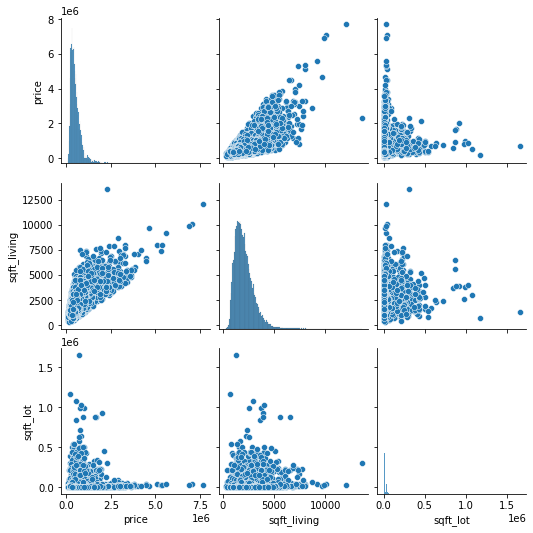

In [3]:
temp = pd.DataFrame({"price": target, "sqft_living": dataset.sqft_living, "sqft_lot": dataset.sqft_lot})
sns.pairplot(data = temp, diag_kind = "hist")

In [4]:
dataset_filt = dataset.copy()
dataset_filt["purchase_date"] = pd.to_datetime(dataset_filt[["date_year", "date_month", "date_day"]].rename({"date_year": "year", "date_month": "month", "date_day": "day"}, axis = 1))
dataset_filt = dataset_filt.astype({"waterfront": bool, "view": bool})
dataset_filt["yr_last_action"] = dataset_filt[["yr_built", "yr_renovated"]].apply(max, axis = 1)
dataset_filt.drop(["zipcode", "purchase_date", "date_year", "date_month", "date_day", "lat", "long", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15"], axis = 1, inplace = True)
# dataset_filt = pd.get_dummies(dataset_filt, columns = ["zipcode"])
dataset_filt

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_last_action
0,3,1.00,1180,5650,1.0,False,False,3,7,1180,0,1955
1,3,2.25,2570,7242,2.0,False,False,3,7,2170,400,1991
2,2,1.00,770,10000,1.0,False,False,3,6,770,0,1933
3,4,3.00,1960,5000,1.0,False,False,5,7,1050,910,1965
4,3,2.00,1680,8080,1.0,False,False,3,8,1680,0,1987
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,False,False,3,8,1530,0,2009
21609,4,2.50,2310,5813,2.0,False,False,3,8,2310,0,2014
21610,2,0.75,1020,1350,2.0,False,False,3,7,1020,0,2009
21611,3,2.50,1600,2388,2.0,False,False,3,8,1600,0,2004


In [5]:
dataset_filt.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_last_action
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,7.656873,1788.390691,291.509045,1973.386018
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,1.175459,828.090978,442.575043,28.806854
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1954.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,1977.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,1999.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000


In [15]:
X = dataset_filt[["sqft_living", "grade"]].to_numpy()
y = target.array
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, train_size = 0.1, test_size = 0.75)
print("X_train shape: {}".format(X_train.shape))

X_train shape: (2161, 2)


In [7]:
# specify boost gradient classifier configuration
model = GradBC(
    n_estimators = 10, # trade-off between accuracy and time
    learning_rate = 0.1, # impact of each tree
    max_depth = 4, # how deep does a decision tree go
    min_samples_leaf = 9, # how many samples need to have good characteristics to be defined a correct approximation (to filter outliers)
    max_features = 0.1
)

In [8]:
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, max_features=0.1, min_samples_leaf=9,
                           n_estimators=10)

In [9]:
model.score(X_test, y_test)

0.001418877236273905

In [10]:
model.score(X_train, y_train)

0.02036094400740398

In [17]:
np.array(y_test)

array([ 365000.,  225000.,  384950., ..., 1155000.,  730000.,  395000.])

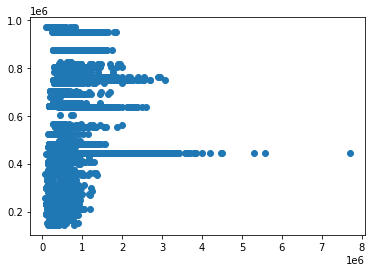